Meal columns detected: 9
 - Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often). [Subway]
 - Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often). [Habit Burger]
 - Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often). [Panda Express]
 - Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often). [Chronic Tacos]
 - Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often). [Hibachi-san]
 - Please rate how often you eat at each of the following on-campus meal options on a scale of 1 to 5 (1 being Never, 5 being Very Often). [Halal Shack]
 - Please rate how often you eat at each of the following

C:\Users\Jonat\AppData\Local\Temp\ipykernel_24980\3194591836.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  meal_data = df[meal_cols].applymap(clean_rating)


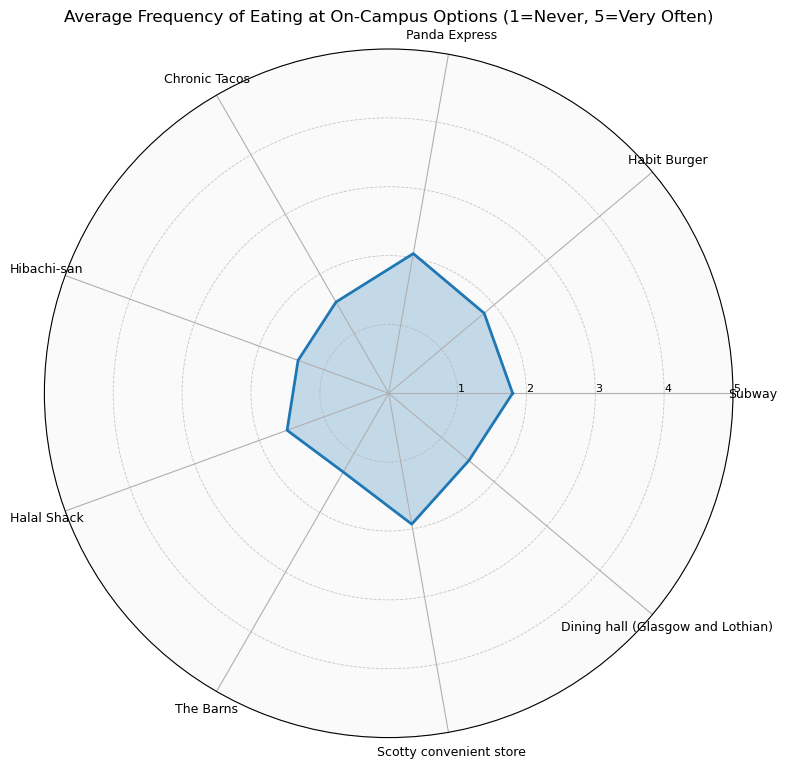

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---- Load ----
df = pd.read_csv("responses.csv")

# ---- Select columns: on-campus meal frequency ----
meal_cols = [
    col for col in df.columns
    if "Please rate how often you eat at each of the following on-campus meal options" in col
]
print(f"Meal columns detected: {len(meal_cols)}")
for c in meal_cols:
    print(" -", c)

# ---- Clean ratings to integers 1–5 ----
def clean_rating(x):
    """
    Converts Google Form mixed strings like '5', '5.0', '5 - Very Often'
    to int 1–5; returns NaN if not parseable.
    """
    if pd.isna(x):
        return np.nan
    x = str(x).strip()
    for ch in x:
        if ch.isdigit():
            return int(ch)
    return np.nan

meal_data = df[meal_cols].applymap(clean_rating)

# ---- Compute averages (per restaurant) ----
avg_ratings = meal_data.mean().round(2)

# ---- Pretty labels (inside square brackets) ----
labels = [col.split("[")[-1].split("]")[0] for col in meal_cols]

# ---- Radar prep ----
values = avg_ratings.values.tolist()
values += values[:1]  # close loop

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# ---- Plot (Radar) ----
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

ax.plot(angles, values, linewidth=2, linestyle="solid", color="#1f77b4")
ax.fill(angles, values, alpha=0.25, color="#1f77b4")

# ---- Axis labels ----
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9)

# ---- Set explicit floor/ceiling and tick marks ----
ax.set_ylim(0, 5)
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_yticklabels(["1", "2", "3", "4", "5"], fontsize=8)
ax.yaxis.grid(True, linestyle="--", linewidth=0.6, alpha=0.7)

# ---- Optional: emphasize visual spacing for ratings ----
ax.set_rlabel_position(0)
ax.set_facecolor("#fafafa")

plt.title("Average Frequency of Eating at On-Campus Options (1=Never, 5=Very Often)", pad=20)
plt.tight_layout()
plt.show()


Detected columns:
- Commute: How far is your commute to UCR (in miles)? Answer with a number only. 
- Meals:


AttributeError: module 'matplotlib.pyplot' has no attribute 'xmax'

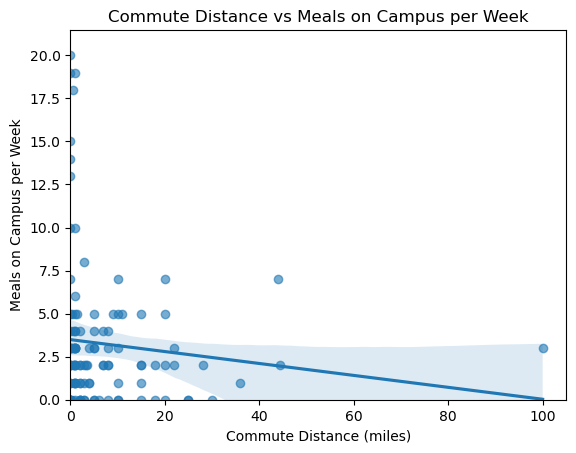

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

# ---- Load dataset ----
df = pd.read_csv("responses.csv")

# ---- Normalize column headers to remove newlines and weird quotes ----
df.columns = [
    re.sub(r"\s+", " ", c.replace("“", '"').replace("”", '"').replace("’", "'")).strip()
    for c in df.columns
]

# ---- Detect the relevant columns ----
commute_col = [c for c in df.columns if "commute" in c.lower() and "ucr" in c.lower()][0]
meals_col = [
    c for c in df.columns
    if "typical week" in c.lower() and "meal" in c.lower() and "campus" in c.lower()
][0]

print("Detected columns:\n- Commute:", commute_col, "\n- Meals:", 
      
    )

# ---- Clean and convert numeric columns ----
df["commute_miles"] = pd.to_numeric(df[commute_col], errors="coerce")
df["meals_per_week"] = pd.to_numeric(df[meals_col], errors="coerce")

# ---- Create scatter + regression line ----
sns.regplot(
    data=df,
    x="commute_miles",
    y="meals_per_week",
    scatter_kws={"alpha": 0.6}
)

# ---- Titles and labels ----
plt.title("Commute Distance vs Meals on Campus per Week")
plt.xlabel("Commute Distance (miles)")
plt.ylabel("Meals on Campus per Week")

# ---- Floor both axes at 0 ----
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

C:\Users\Jonat\AppData\Local\Temp\ipykernel_24980\3997574169.py:42: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[cuisine_cols] = df[cuisine_cols].applymap(clean_rating)


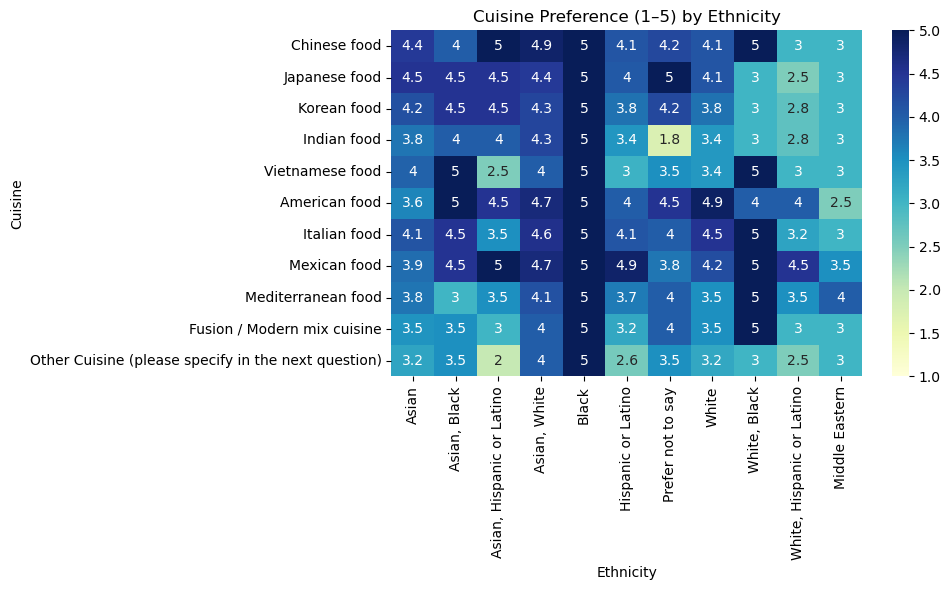


Number of responses per ethnicity:
What is your ethnicity?
Asian                        70
Hispanic or Latino           21
White                        10
Asian, White                  7
Prefer not to say             4
White, Hispanic or Latino     4
Asian, Hispanic or Latino     2
Asian, Black                  2
White, Black                  1
Middle eastern                1
Middle Eastern                1
Black                         1
Name: count, dtype: int64


In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

# ---- Load ----
df = pd.read_csv("responses.csv")

# ---- Normalize headers (handle newlines / smart quotes) ----
def _norm(c: str) -> str:
    c = str(c)
    c = c.replace("\r", " ").replace("\n", " ")
    c = c.replace(""", '"').replace(""", '"').replace("'", "'")
    c = re.sub(r"\s+", " ", c).strip()
    return c

df.columns = [_norm(c) for c in df.columns]

# ---- Detect columns ----
eth_cols = [c for c in df.columns if "ethnic" in c.lower()]
assert eth_cols, "Could not find an ethnicity column (searching for 'ethnic')."
eth_col = eth_cols[0]

cuisine_cols = [
    c for c in df.columns
    if "please rank the following cuisines by your preference" in c.lower()
]
assert cuisine_cols, "No cuisine preference columns found."

# ---- Clean Likert values to integers 1–5 ----
def clean_rating(x):
    if pd.isna(x): 
        return np.nan
    s = str(x).strip()
    # handles "5", "5.0", "5 - Like", "  4 (Neutral)  "
    for ch in s:
        if ch.isdigit():
            return int(ch)
    return np.nan

df[cuisine_cols] = df[cuisine_cols].applymap(clean_rating)

# ---- Average by ethnicity ----
mean_by_eth = df.groupby(eth_col, dropna=False)[cuisine_cols].mean()

# ---- Pretty cuisine labels (text inside [...]) ----
pretty_names = {c: c.split('[')[-1].split(']')[0] if '[' in c and ']' in c else c for c in mean_by_eth.columns}
mean_by_eth = mean_by_eth.rename(columns=pretty_names)

# ---- Filter out "Other" cuisine ----
mean_by_eth = mean_by_eth[[col for col in mean_by_eth.columns if col.lower() != 'other']]

# ---- Combine Middle Eastern variations ----
# First, get all Middle Eastern rows (case-insensitive)
middle_eastern_mask = mean_by_eth.index.str.lower().str.contains('middle.*eastern')
middle_eastern_rows = mean_by_eth[middle_eastern_mask]

if len(middle_eastern_rows) > 1:
    # Compute weighted average based on number of responses for each variant
    counts = df[eth_col].value_counts()
    weights = counts[middle_eastern_rows.index]
    combined_row = (middle_eastern_rows * weights.values[:, np.newaxis]).sum() / weights.sum()
    
    # Remove all Middle Eastern variants and add the combined row
    mean_by_eth = mean_by_eth[~middle_eastern_mask]
    mean_by_eth.loc['Middle Eastern'] = combined_row

# ---- Heatmap ----
plt.figure(figsize=(10, 6))
sns.heatmap(mean_by_eth.T, annot=True, cmap="YlGnBu", vmin=1, vmax=5)
plt.title("Cuisine Preference (1–5) by Ethnicity")
plt.xlabel("Ethnicity")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.show()

# Print counts to help interpret the data
print("\nNumber of responses per ethnicity:")
print(df[eth_col].value_counts().head(15))  # Show top 10 most common responses

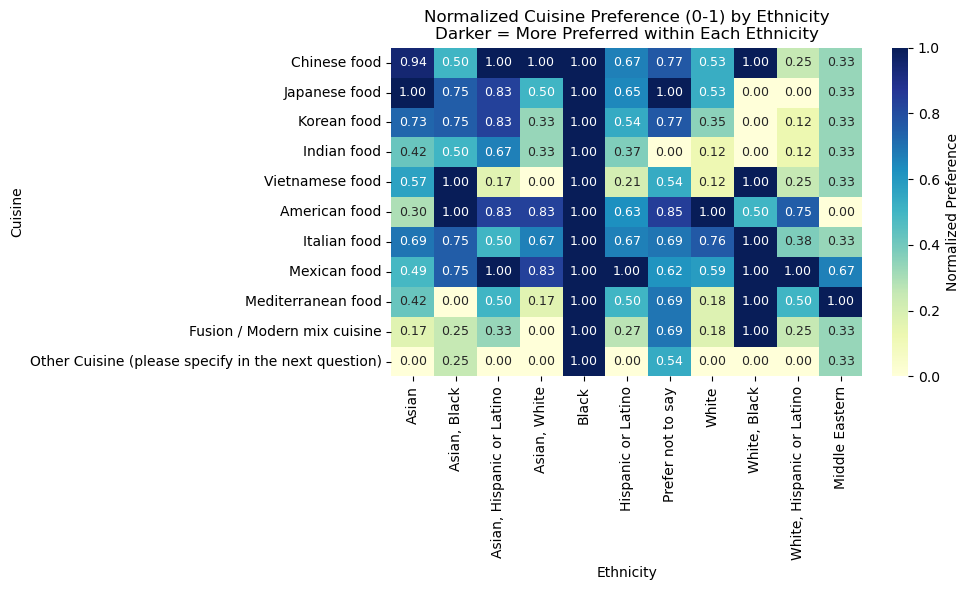


Ethnicity distribution:
What is your ethnicity?
Asian                        70
Hispanic or Latino           21
White                        10
Asian, White                  7
Prefer not to say             4
White, Hispanic or Latino     4
Asian, Hispanic or Latino     2
Asian, Black                  2
White, Black                  1
Middle eastern                1
Name: count, dtype: int64


In [101]:
# ---- Create normalized version (0-1 scale per ethnicity) ----
# Min-max normalization for each ethnicity (row)
norm_by_eth = mean_by_eth.copy()  # Using the filtered mean_by_eth (without "Other" cuisine and combined Middle Eastern)
for eth in norm_by_eth.index:
    row = norm_by_eth.loc[eth]
    if not row.isna().all():  # Only normalize if we have some non-NaN values
        row_min, row_max = row.min(), row.max()
        if row_min != row_max:  # Avoid division by zero if all values are the same
            norm_by_eth.loc[eth] = (row - row_min) / (row_max - row_min)
        else:
            norm_by_eth.loc[eth] = 1  # If all values are the same, normalize to 1

# ---- Heatmap of normalized values ----
plt.figure(figsize=(10, 6))
sns.heatmap(
    norm_by_eth.T, 
    annot=True, 
    cmap="YlGnBu",
    vmin=0,
    vmax=1,
    fmt='.2f',  # Show 2 decimal places for normalized values
    annot_kws={'size': 9},  # Make numbers a bit smaller to fit better
    cbar_kws={'label': 'Normalized Preference'}  # Add colorbar label
)
plt.title("Normalized Cuisine Preference (0-1) by Ethnicity\nDarker = More Preferred within Each Ethnicity")
plt.xlabel("Ethnicity")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.show()

# Print distribution of ethnicities to help interpret
print("\nEthnicity distribution:")
print(df[eth_col].value_counts().head(10))  # Show top 10 most common responses

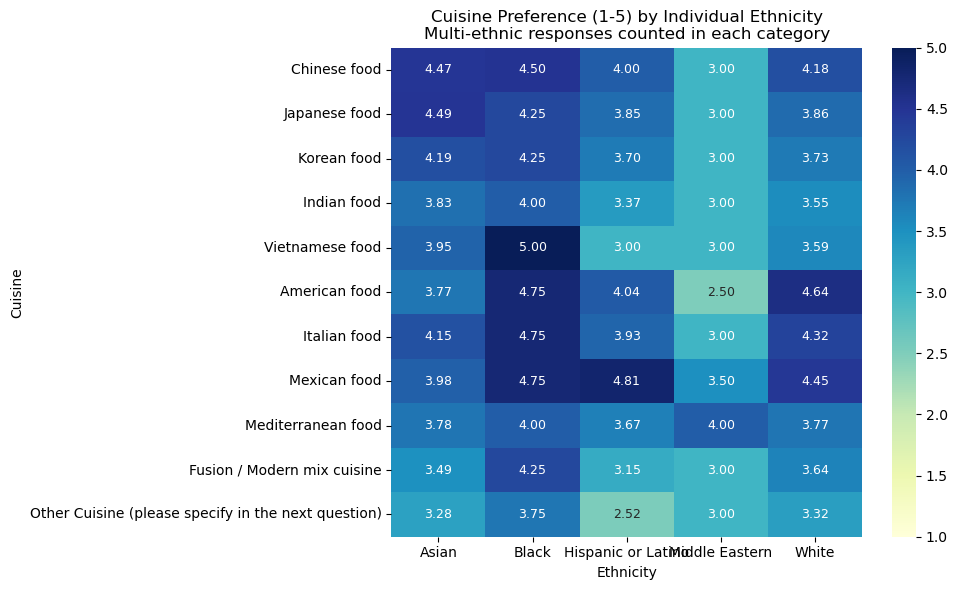

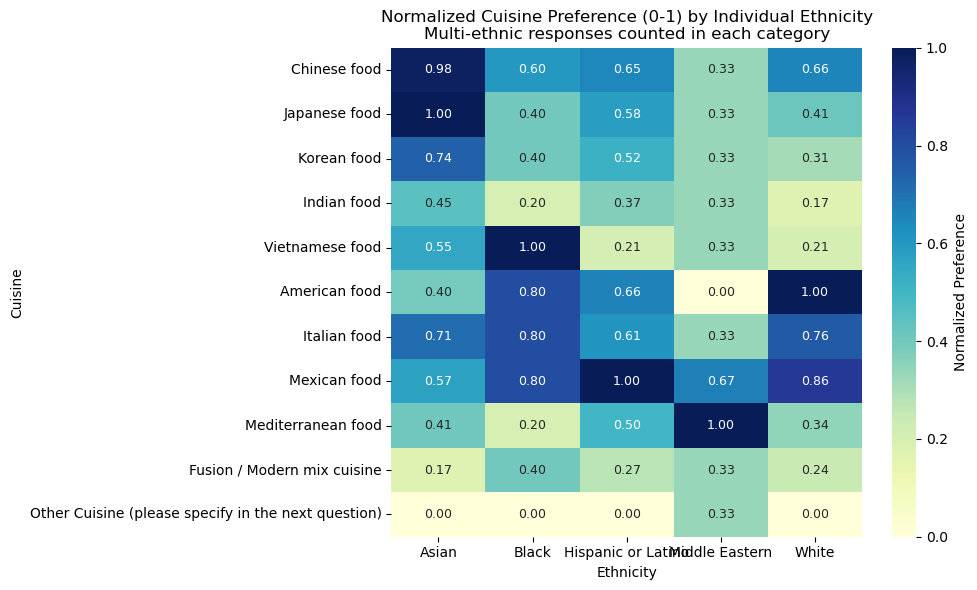


Number of responses in each ethnicity category (after splitting multi-ethnic responses):
ethnicities
Asian                 81
Hispanic or Latino    27
White                 22
Black                  4
Middle Eastern         2
Name: count, dtype: int64


In [102]:
# ---- Create normalized version with split ethnicities ----
# First, let's explode multiple ethnicities into separate rows
df_exploded = df.copy()

# Function to split ethnicities and standardize names
def split_ethnicities(value):
    if pd.isna(value):
        return []
    
    # Normalize text
    s = _norm(value).lower()
    
    # Split on common delimiters
    parts = re.split(r"[;,/]| and | & ", s)
    
    # Match each part to canonical categories
    found = []
    for p in parts:
        for label, pattern in ETH_PATTERNS.items():
            if pattern.search(p):
                found.append(label)
    
    return list(set(found))  # Remove duplicates

# Create exploded dataframe where each person's responses are duplicated for each of their ethnicities
df_exploded['ethnicities'] = df[eth_col].apply(split_ethnicities)
df_exploded = df_exploded.explode('ethnicities')

# Calculate means for the exploded data
mean_by_eth_split = df_exploded.groupby('ethnicities')[cuisine_cols].mean()

# Filter out None/empty ethnicities and rename columns
mean_by_eth_split = mean_by_eth_split[mean_by_eth_split.index.notna()]
mean_by_eth_split = mean_by_eth_split.rename(columns=pretty_names)
mean_by_eth_split = mean_by_eth_split[[col for col in mean_by_eth_split.columns if col.lower() != 'other']]

# ---- Heatmap of raw values (split ethnicities) ----
plt.figure(figsize=(10, 6))
sns.heatmap(
    mean_by_eth_split.T, 
    annot=True, 
    cmap="YlGnBu",
    vmin=1,
    vmax=5,
    fmt='.2f',
    annot_kws={'size': 9}
)
plt.title("Cuisine Preference (1-5) by Individual Ethnicity\nMulti-ethnic responses counted in each category")
plt.xlabel("Ethnicity")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.show()

# ---- Normalize the split ethnicity data ----
norm_by_eth_split = mean_by_eth_split.copy()
for eth in norm_by_eth_split.index:
    row = norm_by_eth_split.loc[eth]
    if not row.isna().all():
        row_min, row_max = row.min(), row.max()
        if row_min != row_max:
            norm_by_eth_split.loc[eth] = (row - row_min) / (row_max - row_min)
        else:
            norm_by_eth_split.loc[eth] = 1

# ---- Heatmap of normalized values (split ethnicities) ----
plt.figure(figsize=(10, 6))
sns.heatmap(
    norm_by_eth_split.T, 
    annot=True, 
    cmap="YlGnBu",
    vmin=0,
    vmax=1,
    fmt='.2f',
    annot_kws={'size': 9},
    cbar_kws={'label': 'Normalized Preference'}
)
plt.title("Normalized Cuisine Preference (0-1) by Individual Ethnicity\nMulti-ethnic responses counted in each category")
plt.xlabel("Ethnicity")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.show()

# Print distribution to show how many responses are in each category after splitting
print("\nNumber of responses in each ethnicity category (after splitting multi-ethnic responses):")
print(df_exploded['ethnicities'].value_counts())

C:\Users\Jonat\AppData\Local\Temp\ipykernel_24980\3575377243.py:99: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(v)
C:\Users\Jonat\AppData\Local\Temp\ipykernel_24980\3575377243.py:100: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(v)


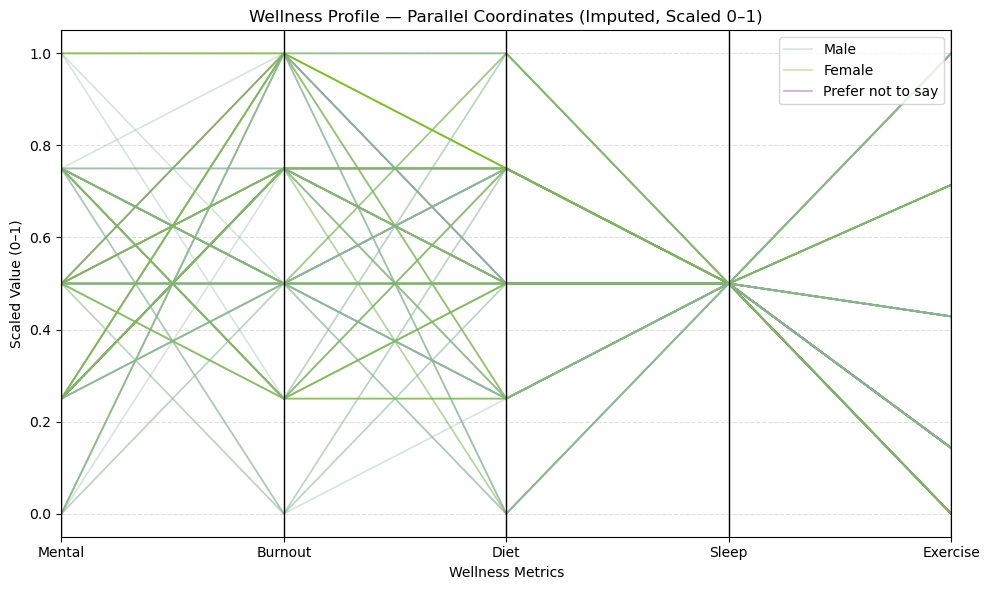

In [112]:
# Lydia's Chunk: Parallel Coordinates — Wellness Profile (Imputed)
# Fix for "No complete rows after cleaning"
# Strategy:
#   1) Detect wellness metrics (robust headers)
#   2) Allow partial responses: keep respondents with ≥ 3 answered metrics
#   3) Impute remaining NaNs with column medians
#   4) Min–Max scale to [0, 1] and plot
#
# Metrics:
#   • Overall Mental Health (Likert 1–5)
#   • Burnout (Likert 1–5)
#   • Diet Health (Likert 1–5)
#   • Sleep per night (average hours)
#   • Physical Exercise Frequency (Likert or numeric)
#
# Grouping (hue):
#   • Uses "Gender" if found; else "All Respondents"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import re

# ---- Load ----
df = pd.read_csv("responses.csv")

# ---- Normalize headers (remove newlines / smart quotes) ----
def _norm(s: str) -> str:
    s = str(s)
    s = s.replace("\r", " ").replace("\n", " ")
    s = s.replace("“", '"').replace("”", '"').replace("’", "'")
    s = re.sub(r"\s+", " ", s).strip()
    return s

df.columns = [_norm(c) for c in df.columns]

# ---- Helpers ----
def find_col(frags, required=True):
    frags = [f.lower() for f in frags]
    cands = [c for c in df.columns if all(f in c.lower() for f in frags)]
    if not cands:
        if required:
            raise KeyError(f"Column with fragments {frags} not found.\nAvailable columns:\n" + "\n".join(df.columns))
        return None
    return max(cands, key=len)

def to_likert_num(x):
    # Extract first digit from mixed responses like '4', '4.0', '4 - Often'
    if pd.isna(x): 
        return np.nan
    s = str(x).strip()
    for ch in s:
        if ch.isdigit():
            return int(ch)
    return np.nan

# ---- Detect wellness metric columns ----
mental_col   = find_col(["overall", "mental"], required=False)
burnout_col  = find_col(["burnout"], required=False)
diet_col     = find_col(["healthy", "diet"], required=False) or find_col(["diet"], required=False)
sleep_col    = find_col(["following table", "sleep per night", "average hours"], required=False)
exercise_col = find_col(["following table", "physical exercise"], required=False)

# Build only the metrics that exist in the CSV
metrics = {}
if mental_col:   metrics["Mental"]   = df[mental_col].apply(to_likert_num)
if burnout_col:  metrics["Burnout"]  = df[burnout_col].apply(to_likert_num)
if diet_col:     metrics["Diet"]     = df[diet_col].apply(to_likert_num)
if sleep_col:    metrics["Sleep"]    = pd.to_numeric(df[sleep_col], errors="coerce")  # hours
if exercise_col: metrics["Exercise"] = df[exercise_col].apply(to_likert_num)

if not metrics:
    raise ValueError("No wellness metrics detected. Check your column headers.")

wellness_df = pd.DataFrame(metrics)

# ---- Grouping (hue) ----
group_col = next((c for c in df.columns if "gender" in c.lower()), None)
wellness_df["Group"] = df[group_col].astype(str).str.strip() if group_col else "All Respondents"

# ---- Keep respondents with at least 3 answered metrics ----
metric_cols = list(metrics.keys())
answered_counts = wellness_df[metric_cols].notna().sum(axis=1)
plot_df = wellness_df.loc[answered_counts >= min(3, len(metric_cols))].copy()

if plot_df.empty:
    print("Still no rows after relaxing completeness. Try lowering the threshold further or verify metric detection.")
else:
    # ---- Impute remaining NaNs with column medians (computed on plot_df) ----
    for col in metric_cols:
        med = plot_df[col].median(skipna=True)
        plot_df[col] = plot_df[col].fillna(med)

    # ---- Min–Max scale to [0, 1] per metric ----
    scaled = plot_df.copy()
    for col in metric_cols:
        v = scaled[col].astype(float).to_numpy()
        vmin = np.nanmin(v)
        vmax = np.nanmax(v)
        if not np.isfinite(vmin) or not np.isfinite(vmax) or vmin == vmax:
            scaled[col] = 0.5  # flat middle if constant/invalid
        else:
            scaled[col] = (scaled[col] - vmin) / (vmax - vmin)

    # ---- Plot ----
    plt.figure(figsize=(10, 6))
    parallel_coordinates(
        scaled[metric_cols + ["Group"]],
        "Group",
        alpha=0.35,
        linewidth=1.2
    )
    plt.title("Wellness Profile — Parallel Coordinates (Imputed, Scaled 0–1)")
    plt.ylabel("Scaled Value (0–1)")
    plt.xlabel("Wellness Metrics")
    plt.grid(axis="y", linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

    # ---- Diagnostics (optional) ----
    # print("Metrics used:", metric_cols)
    # print("Rows plotted:", len(scaled))
